<a href="https://colab.research.google.com/github/tanayvarma123/MLUL2/blob/main/Notebook/MLUL2_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
#!pip install geopandas

In [112]:
import pandas as pd
import datetime as dt
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from itertools import product
from statsmodels.tsa.stattools import adfuller

In [113]:
# from google.colab import drive
# drive.mount('/content/drive')

In [114]:
# !pip install --upgrade ipykernel
# !pip install --upgrade ipython

#### Loading the Source data

In [115]:
# The raw data from kaggle has been divided into 2 parts as GitHub has a limit of 25MB for file size,
file_part1 = "https://raw.githubusercontent.com/tanayvarma123/MLUL2/main/Data/online_retail_part1.csv"
file_part2 = "https://raw.githubusercontent.com/tanayvarma123/MLUL2/main/Data/online_retail_part2.csv"

# Read the two files into DataFrames
part1 = pd.read_csv(file_part1)
part2 = pd.read_csv(file_part2)

# Merge the two DataFrames
retail_df = pd.concat([part1, part2])

retail_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Performing the EDA

In [116]:
# Checking the datatypes and missing values
retail_df.info()
retail_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 270954
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


(541909, 8)

In [117]:
# Describing the daata to see the distribution
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##### Printing the missing values in each column

In [118]:
lst = list(retail_df)
# print(lst)
print('Missing values in each columns')
for cls in lst :
    print(f'{cls} - {retail_df[cls].isnull().sum()}')

Missing values in each columns
InvoiceNo - 0
StockCode - 0
Description - 1454
Quantity - 0
InvoiceDate - 0
UnitPrice - 0
CustomerID - 135080
Country - 0


In [119]:
retail_df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [120]:
print(retail_df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [121]:
retail_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [122]:
retail_df.drop_duplicates(inplace = True)

In [123]:
#remove missing values also
retail_df.dropna(subset = ['CustomerID'], inplace = True)

In [124]:
# Creating "Total" column representing total spending per transaction
retail_df['Total'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [125]:
#retail_df["InvoiceDate"].min()
retail_df["InvoiceDate"].max()

'2011-12-09 12:50:00'

In [126]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [127]:
# Converting InvoceDate column to date
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S').dt.date
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [128]:
# Exatring Month, Week and Year Week from InvoiceDate
retail_df['Month'] = pd.to_datetime(retail_df['InvoiceDate'], format='%Y-%m-%d').dt.strftime('%m')
retail_df['Week'] = pd.to_datetime(retail_df['InvoiceDate'], format='%Y-%m-%d').dt.isocalendar().week
retail_df['YearWeek'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y').dt.to_period('W')


In [129]:
# Creating a dataframe for all cancelled/returned orders
cancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.startswith('C')]

# Creating a dataframe for orders sold within UK
local_orders = retail_df[retail_df['Country'].astype(str).str.contains('United Kingdom')]

# Creating dataframe with orders that were sold outside UK
international_orders = retail_df[~retail_df['Country'].astype(str).str.contains('United Kingdom')]

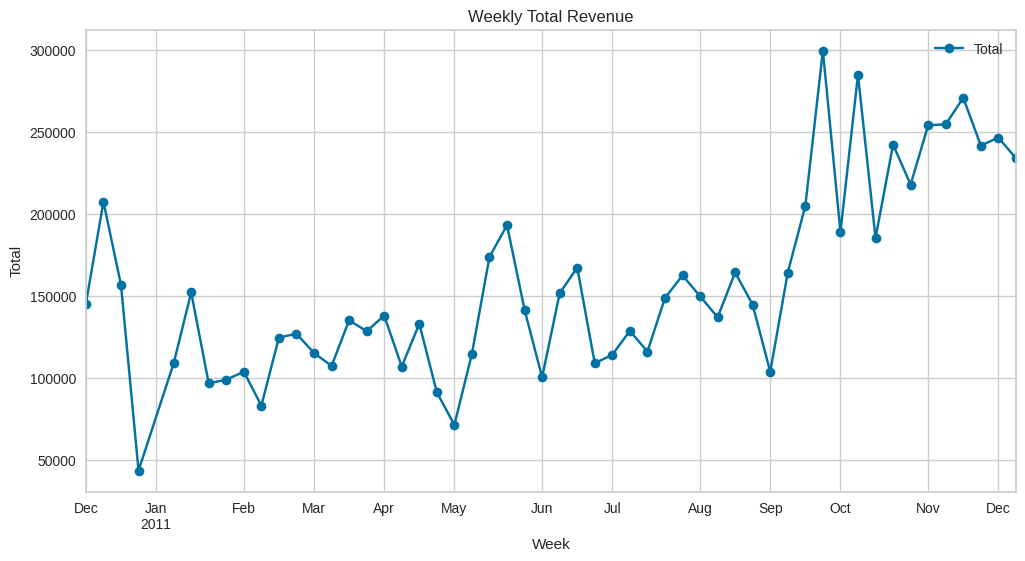

In [130]:
# Calculate weekly revenue for both local and international orders
retail_df_weekly = retail_df.groupby('YearWeek')['Total'].sum()

# Plot weekly revenue for both local and international orders
plt.figure(figsize=(12, 6))
retail_df_weekly.plot(kind='line', marker='o', label='Total')
plt.title('Weekly Total Revenue')
plt.xlabel('Week')
plt.ylabel('Total')
plt.grid(True)
plt.legend()
plt.show()

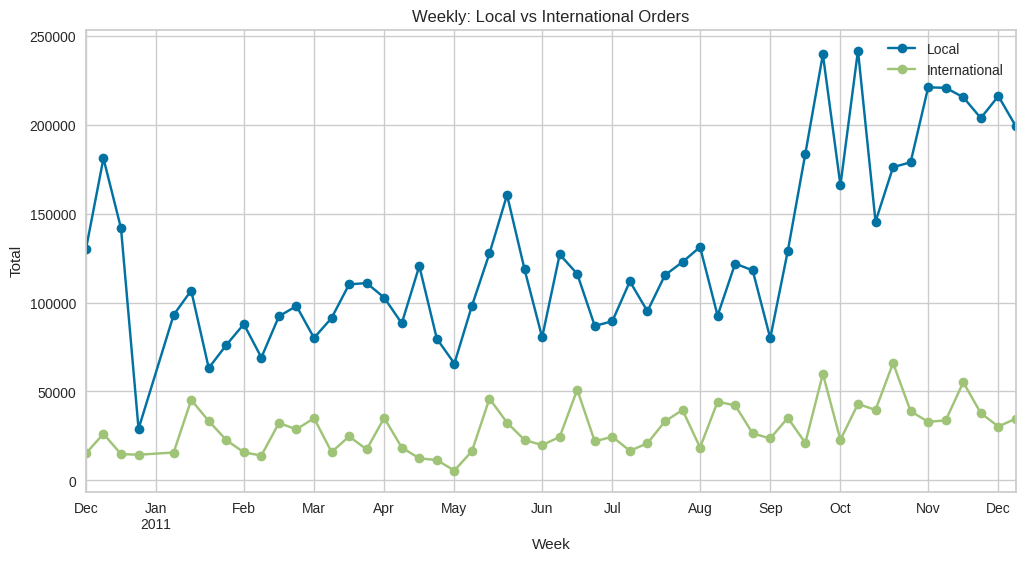

In [131]:
# Calculate weekly revenue for both local and international orders
local_orders_weekly = local_orders.groupby('YearWeek')['Total'].sum()
international_orders_weekly = international_orders.groupby('YearWeek')['Total'].sum()

# Plot weekly revenue for both local and international orders
plt.figure(figsize=(12, 6))
local_orders_weekly.plot(kind='line', marker='o', label='Local')
international_orders_weekly.plot(kind='line', marker='o', label='International')
plt.title('Weekly: Local vs International Orders')
plt.xlabel('Week')
plt.ylabel('Total')
plt.grid(True)
plt.legend()
plt.show()

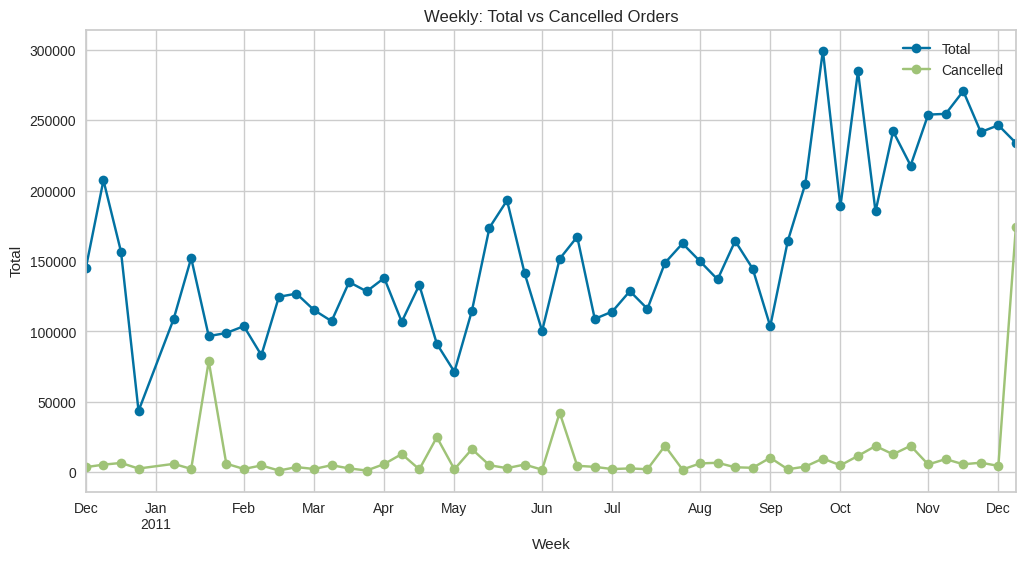

In [132]:
# Calculate weekly revenue for both local and international orders
cancelled_orders_weekly = cancelled_orders.groupby('YearWeek')['Total'].sum().abs()

# Plot weekly revenue for both local and international orders
plt.figure(figsize=(12, 6))
retail_df_weekly.plot(kind='line', marker='o', label='Total')
cancelled_orders_weekly.plot(kind='line', marker='o', label='Cancelled')
plt.title('Weekly: Total vs Cancelled Orders')
plt.xlabel('Week')
plt.ylabel('Total')
plt.grid(True)
plt.legend()
plt.show()

Country
Germany        9480
France         8475
EIRE           7475
Spain          2528
Netherlands    2371
Belgium        2069
Switzerland    1877
Portugal       1471
Australia      1258
Norway         1086
Name: count, dtype: int64


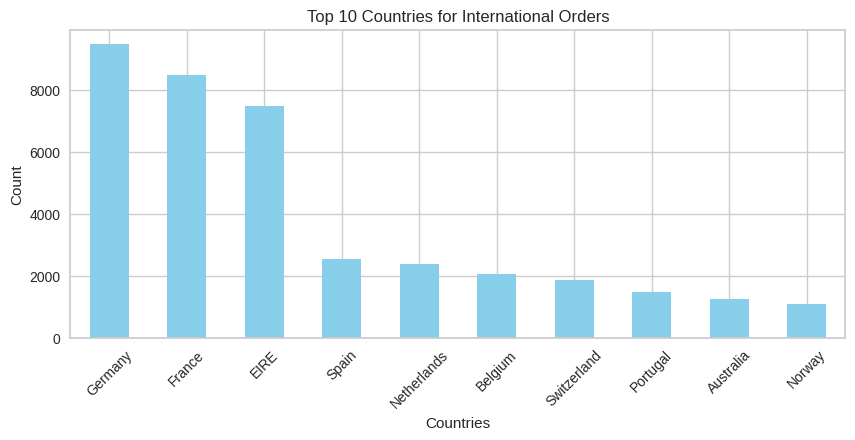

In [133]:
value_counts = international_orders['Country'].value_counts()

# Select the top 10 categories
top_10_categories = value_counts.head(10)
print(top_10_categories)

# Plot the histogram for top 10 categories
plt.figure(figsize=(10, 4))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries for International Orders')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Country
United Kingdom    7501
Germany            453
EIRE               247
France             148
USA                112
Australia           74
Spain               48
Italy               45
Belgium             38
Japan               37
Name: count, dtype: int64


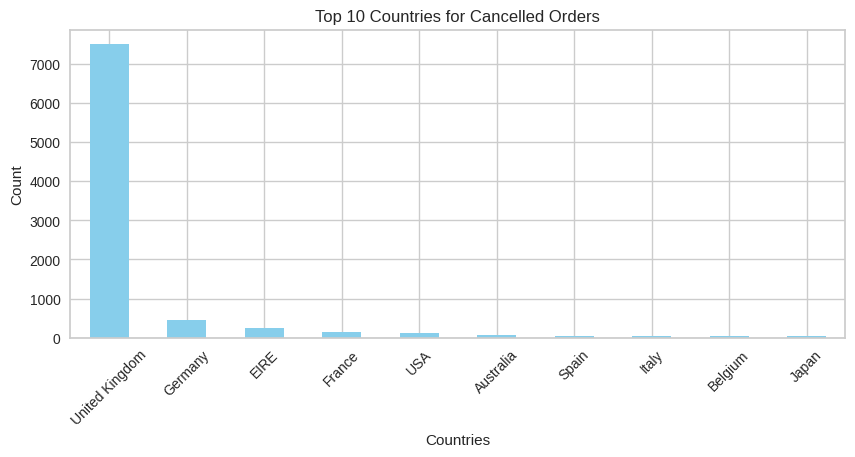

In [134]:
value_counts = cancelled_orders['Country'].value_counts()

# Select the top 10 categories
top_10_categories = value_counts.head(10)
print(top_10_categories)

# Plot the histogram for top 10 categories
plt.figure(figsize=(10, 4))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries for Cancelled Orders')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
Name: count, dtype: int64


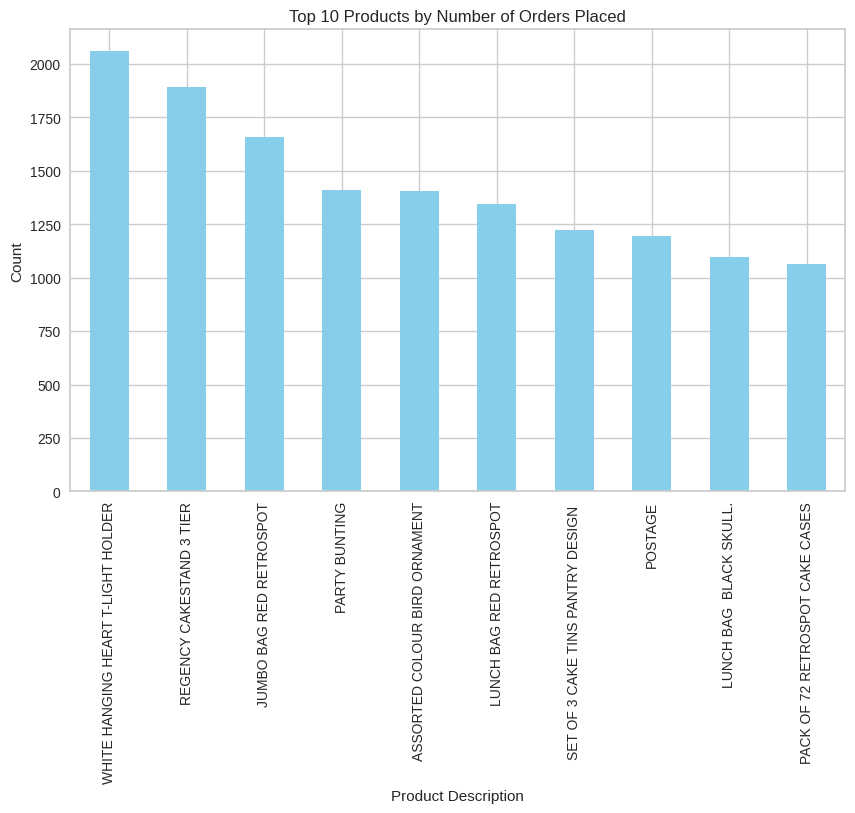

In [135]:
value_counts = retail_df['Description'].value_counts()

# Select the top 10 categories
top_10_categories = value_counts.head(10)
print(top_10_categories)

# Plot the histogram for top 10 categories
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Number of Orders Placed')
plt.xlabel('Product Description')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

                             Description      Total
2780            REGENCY CAKESTAND 3 TIER  132567.70
3716  WHITE HANGING HEART T-LIGHT HOLDER   93767.80
1771             JUMBO BAG RED RETROSPOT   83056.52
2355                       PARTY BUNTING   67628.43
2624                             POSTAGE   66710.24
217        ASSORTED COLOUR BIRD ORNAMENT   56331.91
2669                  RABBIT NIGHT LIGHT   51042.84
725                        CHILLI LIGHTS   45915.41
2323     PAPER CHAIN KIT 50'S CHRISTMAS    41423.78
2405      PICNIC BASKET WICKER 60 PIECES   39619.50


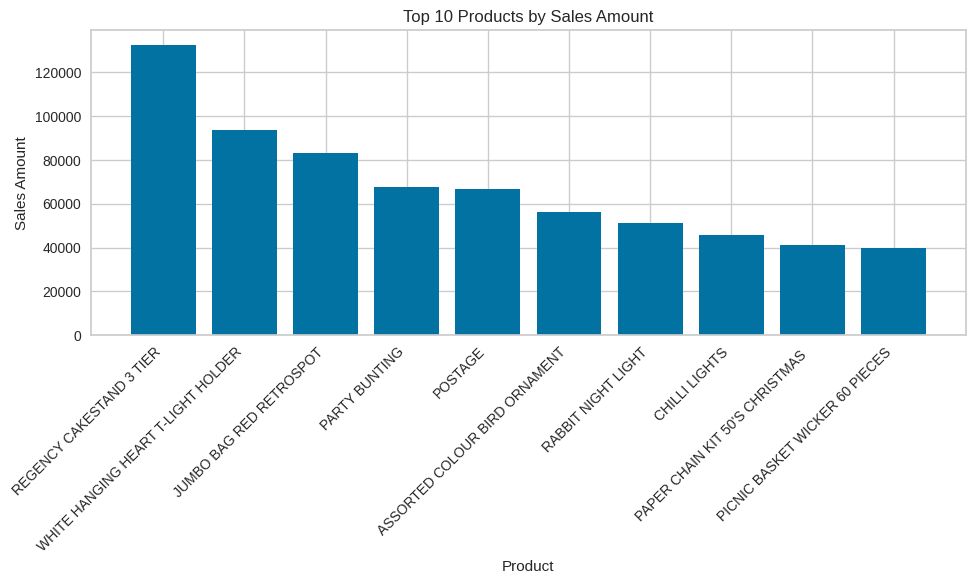

In [136]:
# Creating df with top 10 products
top_prd = retail_df[['Description', 'Total']]
top_prd2 = top_prd.groupby('Description').sum('Total').reset_index().nlargest(10, 'Total')
print(top_prd2)

# Generating bar plot for top 10 products
plt.figure(figsize=(10, 6))
plt.bar(top_prd2['Description'], top_prd2['Total'])
plt.title("Top 10 Products by Sales Amount")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel("Product")
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


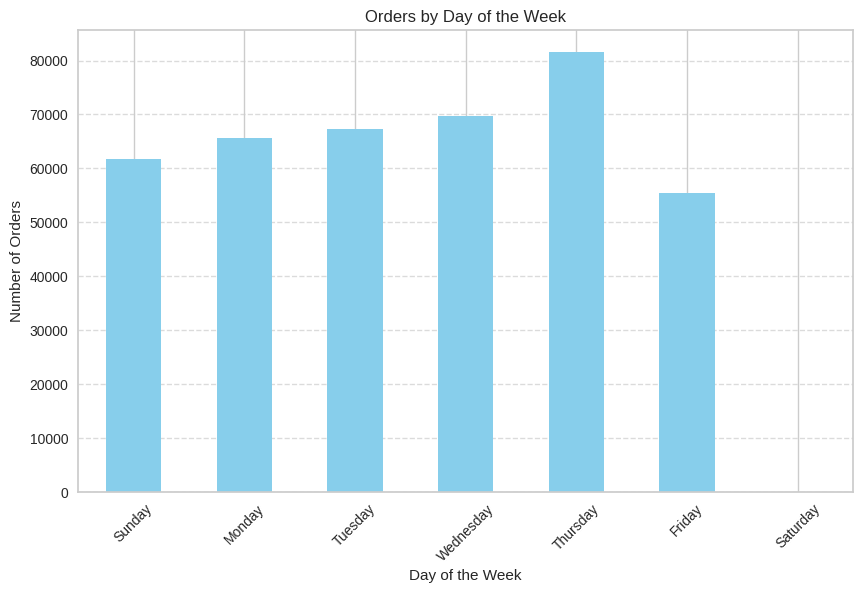

In [137]:
# Assuming 'orders' DataFrame already exists and has a 'Date' column in '%d-%m-%Y' format
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y')

# Extract the day of the week
retail_df['DayOfWeek'] = retail_df['InvoiceDate'].dt.day_name()

# Define the correct order for days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert to categorical with the specified order
retail_df['DayOfWeek'] = pd.Categorical(retail_df['DayOfWeek'], categories=day_order, ordered=True)

# Plot a histogram of the day of the week
plt.figure(figsize=(10, 6))
retail_df['DayOfWeek'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

      CustomerID      Total
1703       14646  279489.02
4233       18102  256438.49
3758       17450  187322.17
1895       14911  132458.73
55         12415  123725.45
1345       14156  113214.59
3801       17511   88125.38
3202       16684   65892.08
1005       13694   62690.54
2192       15311   59284.19


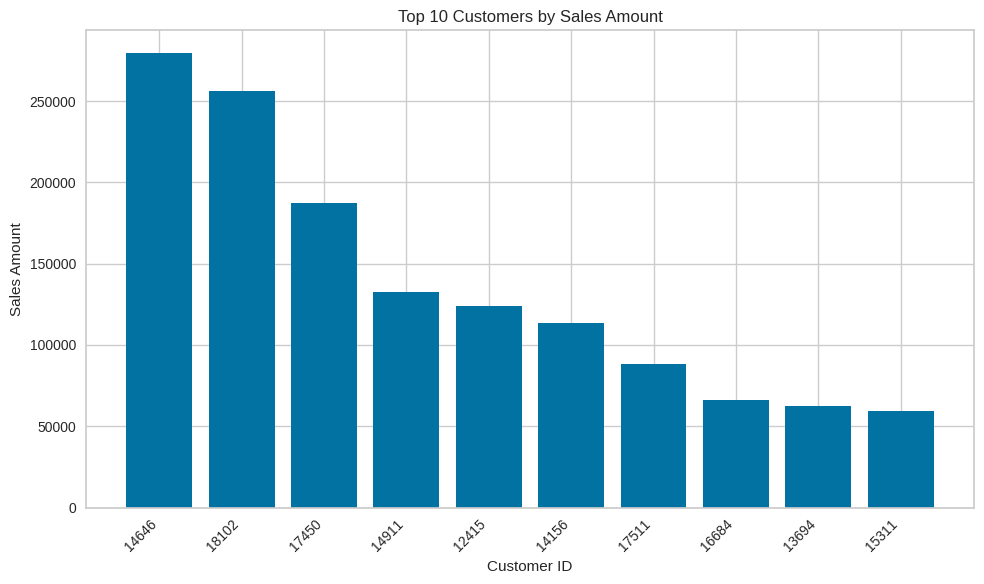

In [138]:
# Finding customers with highest orders
top_cst = retail_df[['CustomerID', 'Total']]
top_cst2 = top_cst.groupby('CustomerID').sum('Total').reset_index().nlargest(10, 'Total')
top_cst2['CustomerID'] = top_cst2['CustomerID'].astype(int)
print(top_cst2)

# Generating bar plot for top 10 customers
plt.figure(figsize=(10, 6))
plt.bar(top_cst2['CustomerID'].astype(str), top_cst2['Total'])
plt.title("Top 10 Customers by Sales Amount")
plt.ylabel("Sales Amount")
plt.xlabel("Customer ID")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


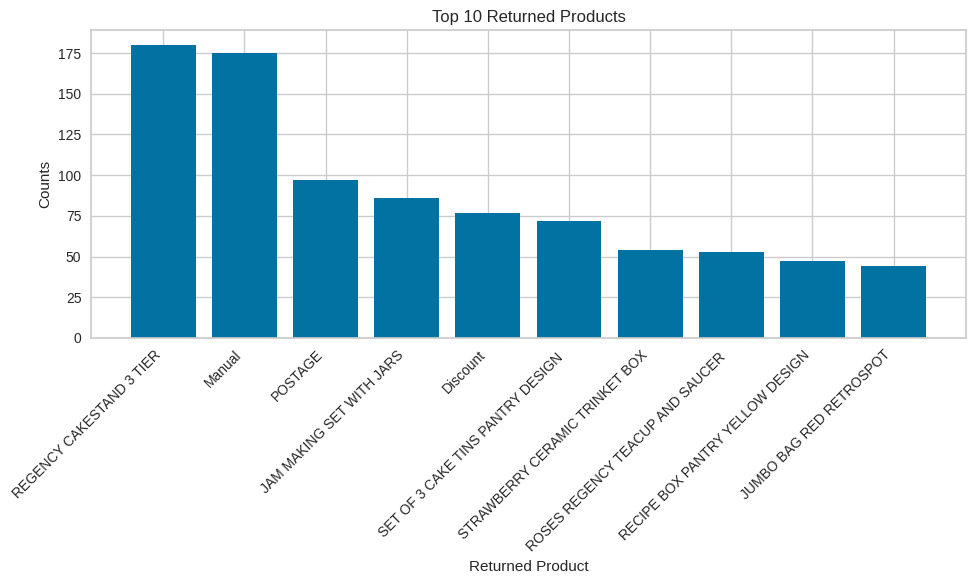

In [139]:
# Extracting returned products
rtn_prd = retail_df[['InvoiceNo', 'Description', 'CustomerID']]
rtn_prd = rtn_prd[retail_df.InvoiceNo.str.startswith('C')]

# Finding top 10 returned products
mst_rtn_prd = rtn_prd.groupby('Description').count().nlargest(10, 'InvoiceNo').reset_index()

# Generating bar plot for top 10 returned products
plt.figure(figsize=(10, 6))
plt.bar(mst_rtn_prd['Description'], mst_rtn_prd['InvoiceNo'])
plt.title("Top 10 Returned Products")
plt.ylabel("Counts")
plt.xlabel("Returned Product")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

##### Customers with highest number of returns

CustomerID
14911    226
17841    136
17511    113
15311    112
12607    101
14410     92
13798     89
14606     82
13113     79
12471     71
Name: count, dtype: int64


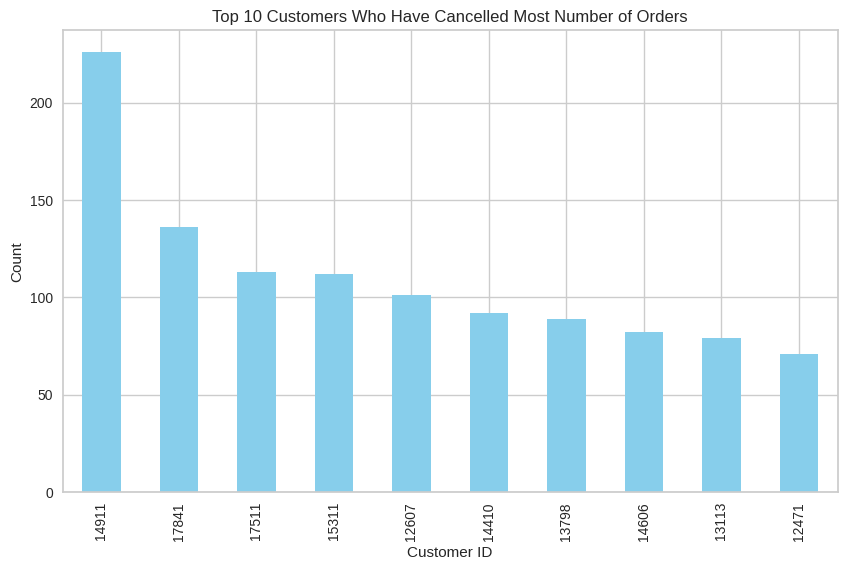

In [140]:
cancelled_orders['CustomerID'] = cancelled_orders['CustomerID'].astype(int)
value_counts = cancelled_orders['CustomerID'].value_counts()

# Select the top 10 categories
top_10_categories = value_counts.head(10)
print(top_10_categories)

#Plot the histogram for top 10 categories
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers Who Have Cancelled Most Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [141]:
import geopandas as gpd

In [142]:
cntry_df = retail_df[['Country' , 'Total']]
cntry_df = cntry_df.groupby('Country').sum('Total').reset_index()
cntry_df

,Country,Total
0,Australia,137009.770
1,Austria,10154.320
2,Bahrain,548.400
3,Belgium,40910.960
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20076.390
7,Cyprus,12858.760
8,Czech Republic,707.720
9,Denmark,18768.140


In [143]:
import geopandas as gpd

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

gdf = gpd.read_file(url)

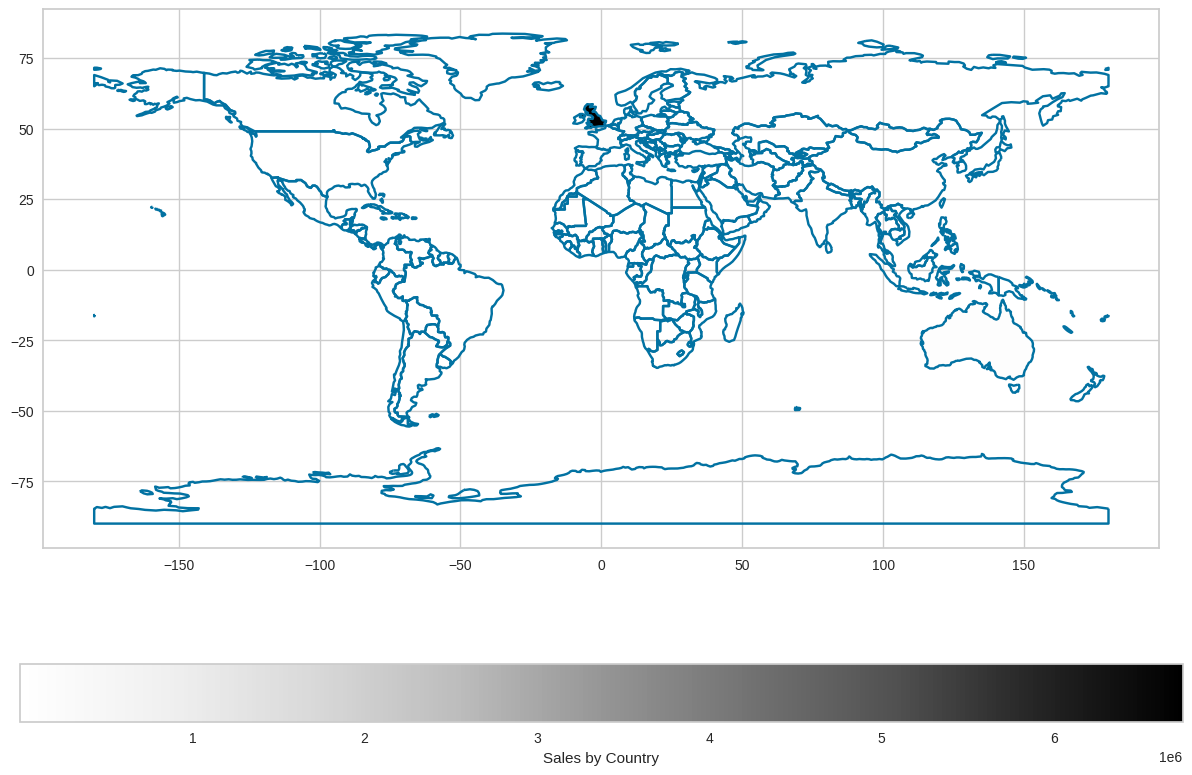

In [216]:
world = gdf.merge(cntry_df, how='left', left_on='SOVEREIGNT', right_on='Country')

# gdf
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Total', ax=ax, legend=True,
           legend_kwds={'label': "Sales by Country",
                        'orientation': "horizontal"})
plt.show()

#### **Performing RFM**

**Creating Recency**

In [145]:
#Recency
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])
latest_date = retail_df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = retail_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': 'count','Total': 'sum' }).reset_index()

rfm.rename(columns = {'InvoiceDate': 'Recency','InvoiceNo': 'Frequency','Total': 'MonetaryValue'}, inplace = True)

In [146]:
#Recency score based on quantiles
#Assigning labels from 1-5,  1 being the lowest recency
rfm["Recency_score"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])

#Frequency score
rfm["Frequency_score"] = pd.qcut(rfm['Frequency'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])

In [147]:
#Combine Recency and Frequency scores to create RFM Segment
rfm["rfm_segment"] = rfm['Recency_score'].astype(str) + rfm['Frequency_score'].astype(str)

In [148]:
rfm

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment
0,12346.0,326,2,0.00,1,1,11
1,12347.0,3,182,4310.00,5,5,55
2,12348.0,76,31,1797.24,2,3,23
3,12349.0,19,73,1757.55,4,4,44
4,12350.0,311,17,334.40,1,2,12
...,...,...,...,...,...,...,...
4367,18280.0,278,10,180.60,1,1,11
4368,18281.0,181,7,80.82,1,1,11
4369,18282.0,8,13,176.60,5,1,51
4370,18283.0,4,721,2045.53,5,5,55


**Recency Distribution**

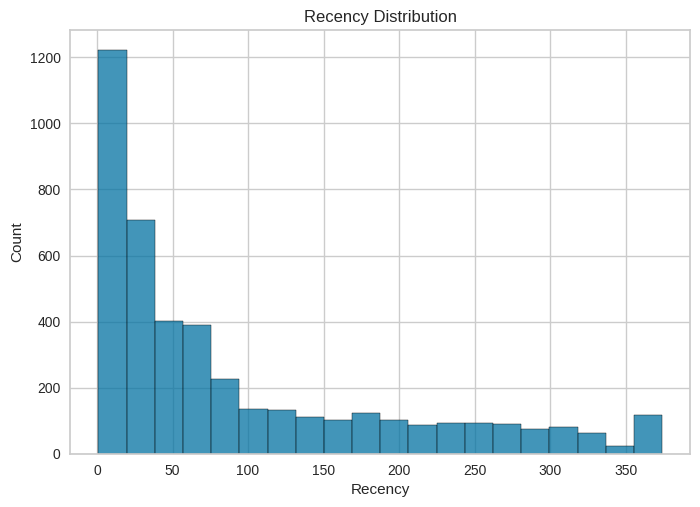

In [149]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
####################################
# recency Distribution
sns.histplot(data = rfm, x = 'Recency', bins = 20)
plt.title('Recency Distribution')
plt.show()

**Frequency Distribution**

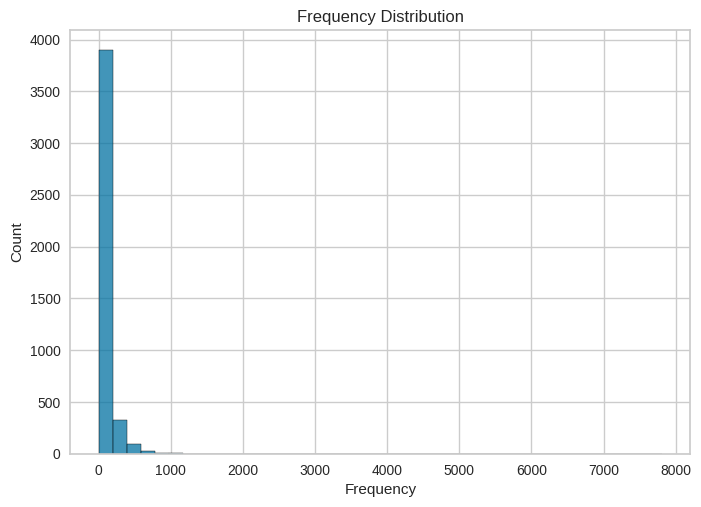

In [150]:
sns.histplot(data = rfm, x = 'Frequency', bins = 40)
plt.title('Frequency Distribution')
plt.show()

**Monetary Distribution**

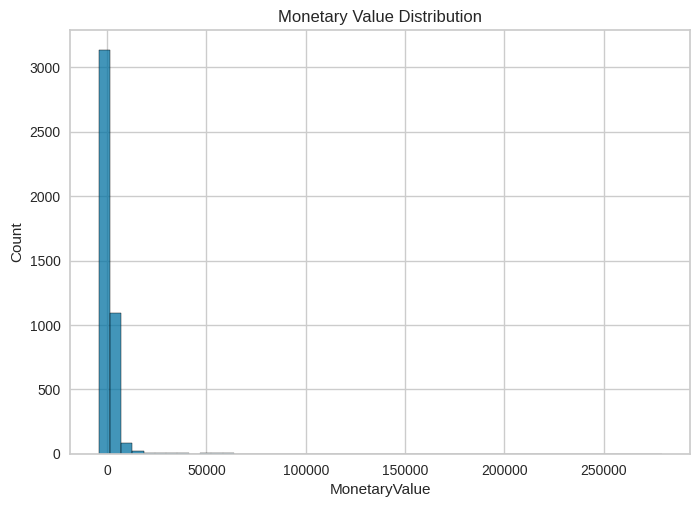

In [151]:
sns.histplot(data = rfm, x = 'MonetaryValue', bins = 50)
plt.title('Monetary Value Distribution')
plt.show()

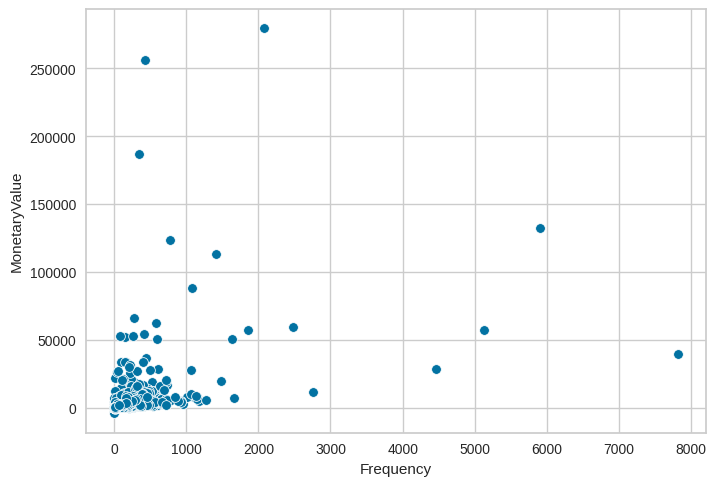

In [152]:
sns.scatterplot(data = rfm,
               x = 'Frequency',
               y = 'MonetaryValue');

<Axes: xlabel='Recency', ylabel='MonetaryValue'>

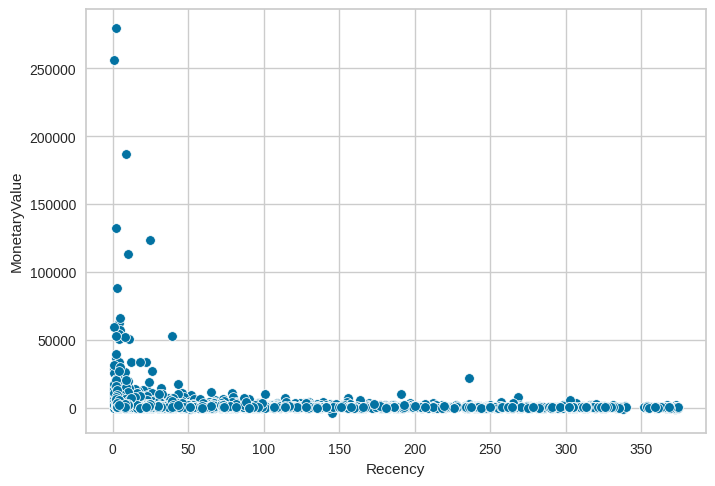

In [153]:
sns.scatterplot(data = rfm,
               x = 'Recency',
               y = 'MonetaryValue')

**CUSTOMER SEGMENTATION**

In [154]:
#Mapping segments to their corresponding customer segments
segment_map = {
    r'[1-2][1-2]' : 'Inactive',
    r'[1-2][3-4]' : 'Vulnerable',
    r'[1-2]5' : "Secure",
    r'3[1-2]' : 'On the Edge',
    r'33' : 'Need Attention',
    r'[3-4][4-5]' : 'Loyal Customers',
    r'41' : 'Promising',
    r'51' : 'New Customers',
    r'[4-5][2-3]' : 'Potential Loyalists',
    r'5[4-5]' : 'Best Customers',
}

In [155]:
rfm['rfm_segment'] = rfm['rfm_segment'].replace(segment_map, regex = True)

In [156]:
rfm

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment
0,12346.0,326,2,0.00,1,1,Inactive
1,12347.0,3,182,4310.00,5,5,Best Customers
2,12348.0,76,31,1797.24,2,3,Vulnerable
3,12349.0,19,73,1757.55,4,4,Loyal Customers
4,12350.0,311,17,334.40,1,2,Inactive
...,...,...,...,...,...,...,...
4367,18280.0,278,10,180.60,1,1,Inactive
4368,18281.0,181,7,80.82,1,1,Inactive
4369,18282.0,8,13,176.60,5,1,New Customers
4370,18283.0,4,721,2045.53,5,5,Best Customers


#### Performing Segmentation using KMeans

**Standardization & Scaling**

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'MonetaryValue']])

rfm_scaled

array([[ 2.31656788, -0.39205597, -0.23041952],
       [-0.88904975,  0.39329343,  0.29405454],
       [-0.16456032, -0.26552745, -0.01171748],
       ...,
       [-0.83942719, -0.34406239, -0.20892947],
       [-0.87912524,  2.74497857,  0.01849636],
       [-0.49206924, -0.09536842, -0.00684511]])

In [158]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_

In [159]:
rfm

,CustomerID,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,rfm_segment,Cluster
0,12346.0,326,2,0.00,1,1,Inactive,1
1,12347.0,3,182,4310.00,5,5,Best Customers,0
2,12348.0,76,31,1797.24,2,3,Vulnerable,0
3,12349.0,19,73,1757.55,4,4,Loyal Customers,0
4,12350.0,311,17,334.40,1,2,Inactive,1
...,...,...,...,...,...,...,...,...
4367,18280.0,278,10,180.60,1,1,Inactive,1
4368,18281.0,181,7,80.82,1,1,Inactive,1
4369,18282.0,8,13,176.60,5,1,New Customers,0
4370,18283.0,4,721,2045.53,5,5,Best Customers,0


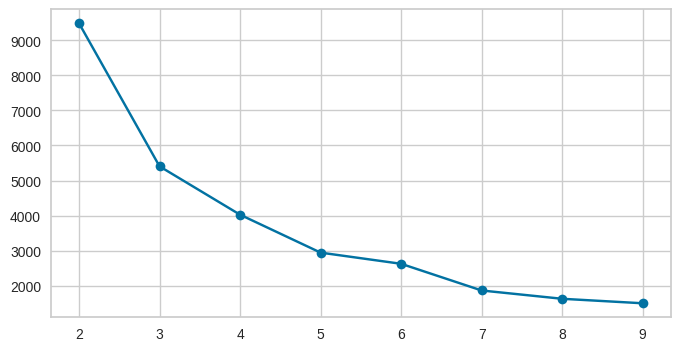

In [160]:
cluster_range = range( 2, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( rfm_scaled )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(8,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

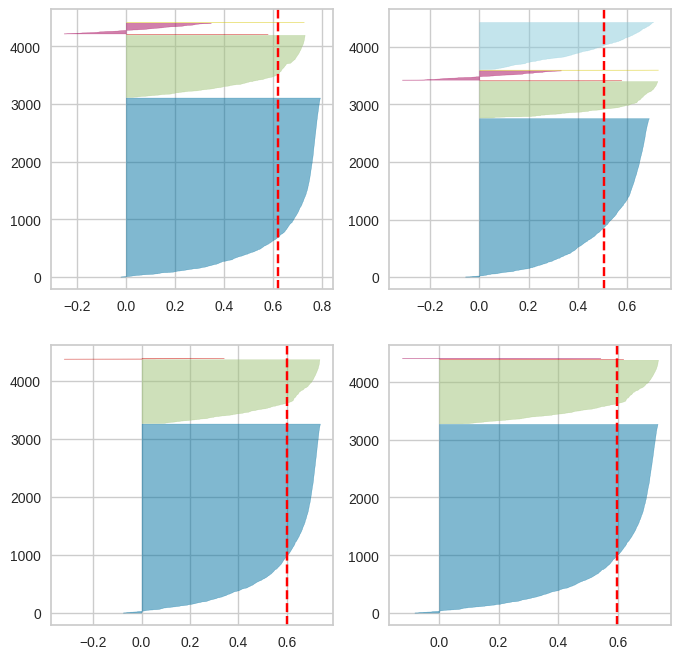

In [161]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(8,8))
num_clusters = [3, 4, 5, 6]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k,
                random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[q-1][mod])
    visualizer.fit(rfm_scaled)

In [162]:
new_rfm = rfm[["Recency", "Frequency", "MonetaryValue", "rfm_segment"]]

In [163]:
#Convert index to integer
new_rfm.index = new_rfm.index.astype(int)
new_rfm.head()

,Recency,Frequency,MonetaryValue,rfm_segment
0,326,2,0.00,Inactive
1,3,182,4310.00,Best Customers
2,76,31,1797.24,Vulnerable
3,19,73,1757.55,Loyal Customers
4,311,17,334.40,Inactive


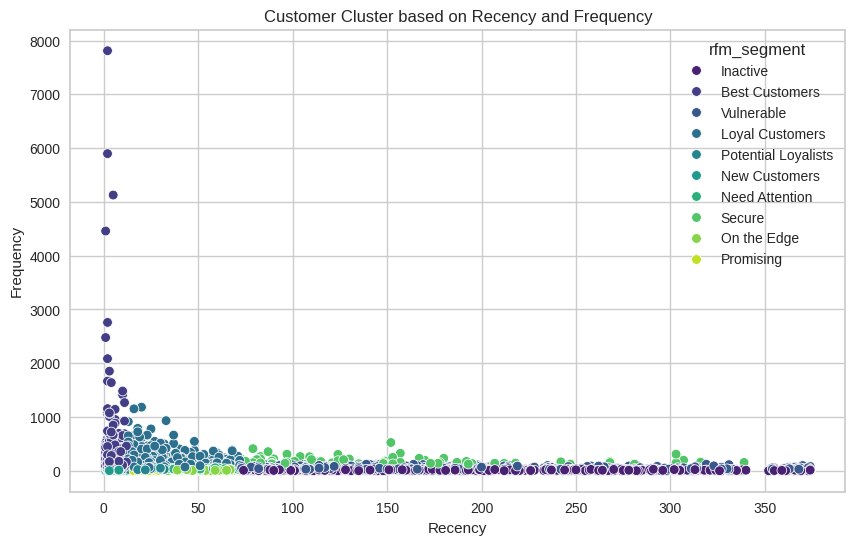

In [164]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Recency', y = 'Frequency', hue = 'rfm_segment', data = new_rfm, palette = 'viridis')
plt.title('Customer Cluster based on Recency and Frequency')
plt.show()

**RFM Segment wise heatmap**

In [165]:
import plotly.express as px
#Top 10 most preferred products
segments = new_rfm['rfm_segment'].value_counts()

fig = px.bar(
     x = segments.index,
     y = segments.values,
     color = segments.index,
     text = segments.values,
     title = "RFM Segments"
)
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)
fig.show()

In [166]:
#sns.heatmap(new_rfm['rfm_segment'],
  #         annot = True,
   #        fmt = "0.3f",
    #       cmap = "crest");
#plt.xlabel("Recency")
#plt.ylabel("Frequency");

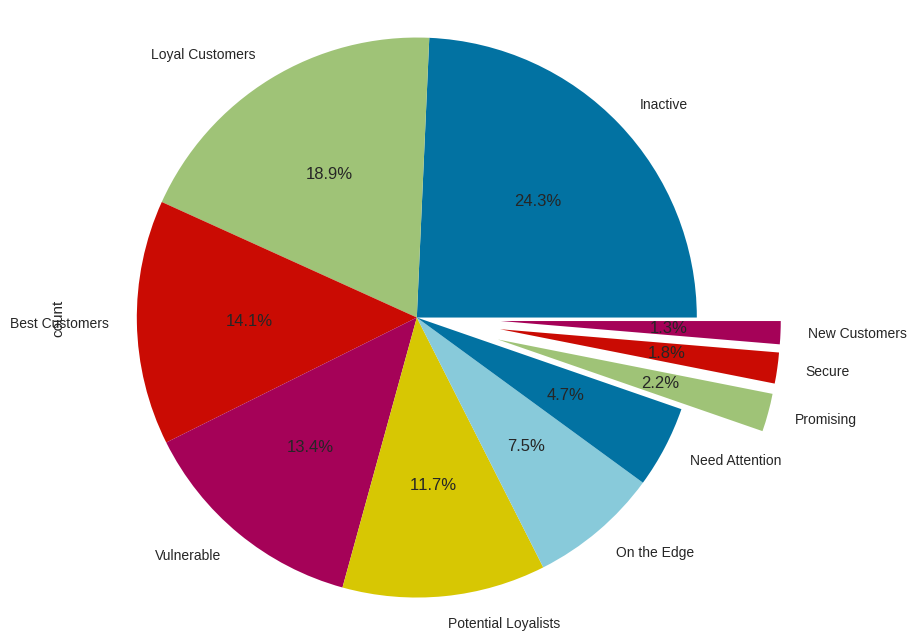

In [167]:
plt.figure(figsize = (10, 8), )
explode = (0, 0, 0, 0, 0, 0, 0, 0.3, 0.3, 0.3)

segments.plot(
    kind = 'pie',
    color=segments.index,
    explode = explode,
    autopct = '%1.1f%%')
plt.axis('equal')
#plt.legend(labels = segments.index, loc = "best")
plt.show()


#### Outlier Detection using **Local Outlier Factor**

In [168]:
cst_df = retail_df[retail_df['CustomerID'].notna()].groupby('CustomerID').agg(
    unqsku = ('StockCode', 'nunique'),
    totalqty = ('Quantity','sum'),
    totalamt = ('Total', 'sum')).reset_index()
cst_df.head()

,CustomerID,unqsku,totalqty,totalamt
0,12346.0,1,0,0.00
1,12347.0,103,2458,4310.00
2,12348.0,22,2341,1797.24
3,12349.0,73,631,1757.55
4,12350.0,17,197,334.40


In [169]:
cst_df2 = cst_df[['unqsku','totalqty','totalamt']]
cst_df2.head()

,unqsku,totalqty,totalamt
0,1,0,0.00
1,103,2458,4310.00
2,22,2341,1797.24
3,73,631,1757.55
4,17,197,334.40


In [170]:
# Performing the feature scaling on the columns
cust_norm = pd.DataFrame(preprocessing.scale(cst_df2), columns=cst_df2.columns)
cust_norm.head()

,unqsku,totalqty,totalamt
0,-0.704922,-0.239517,-0.230420
1,0.489243,0.286544,0.294055
2,-0.459064,0.261504,-0.011717
3,0.138018,-0.104470,-0.016547
4,-0.517602,-0.197355,-0.189727


In [171]:
cust_norm.describe()

,unqsku,totalqty,totalamt
count,4.372000e+03,4.372000e+03,4.372000e+03
mean,1.787733e-17,-6.500848e-18,1.137648e-17
std,1.000114e+00,1.000114e+00,1.000114e+00
min,-7.049215e-01,-3.043649e-01,-7.521714e-01
25%,-5.410165e-01,-2.070394e-01,-1.949117e-01
50%,-3.068666e-01,-1.616136e-01,-1.520441e-01
75%,1.848483e-01,-3.486029e-02,-3.470490e-02
max,2.028662e+01,4.186228e+01,3.377996e+01


In [172]:
# Using Local Outlier Factor (LOF) model with 5 neighbors
lof = LocalOutlierFactor(n_neighbors=5)
lof_predictions = lof.fit_predict(cust_norm)

# Generating the score
lof_scores = -lof.negative_outlier_factor_
lof_scores

array([0.98683587, 1.17583856, 1.09297639, ..., 0.98760378, 1.00417156,
       1.11614985])

Text(0.5, 0, 'Outlier Score')

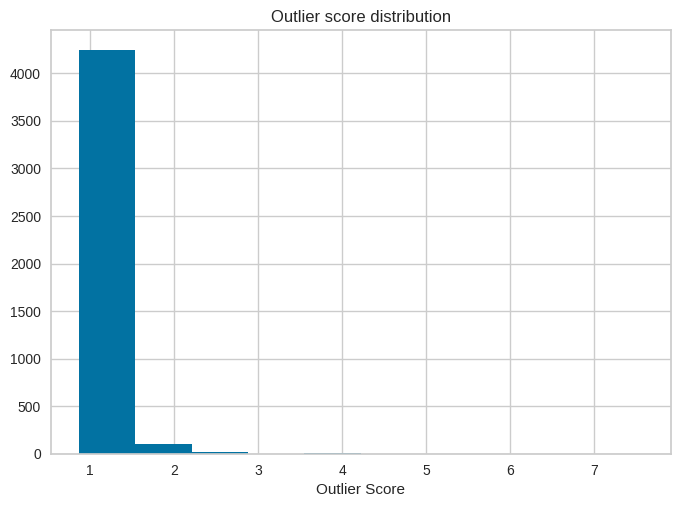

In [173]:
# Visualizing the LOF Score using histogram
cust_norm['lof_scores'] = lof_scores
cust_norm['lof_scores'].hist()
plt.title("Outlier score distribution")
plt.xlabel("Outlier Score")

Text(0.5, 0, 'Outlier Score')

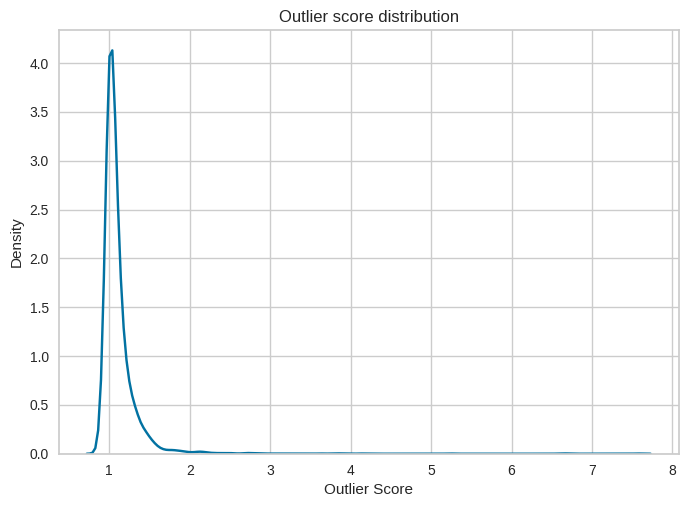

In [174]:
# Visualizing the Score using Kernel density
sns.kdeplot(cust_norm['lof_scores'])
plt.title("Outlier score distribution")
plt.xlabel("Outlier Score")

In [175]:
# Printing top 10 LOF Scores
cust_norm.sort_values(['lof_scores'], ascending=False)[:10]

,unqsku,totalqty,totalamt,lof_scores
3103,-0.353697,-0.304365,-0.242093,7.577520
1544,-0.646384,-0.226890,-0.235701,6.685551
1059,-0.634677,-0.239517,-0.230420,6.618721
2892,-0.470772,-0.273332,-0.266328,5.236047
3829,-0.576139,-0.267768,-0.247636,4.137847
2578,-0.517602,-0.300085,-0.332730,3.926462
3756,-0.704922,-0.239731,-0.752171,3.833703
619,-0.704922,-0.239731,-0.304875,3.788646
3650,-0.704922,-0.270336,-0.248994,3.625346
2560,-0.704922,-0.239731,-0.285352,3.056260


In [176]:
#Printing where LOF Score is greater than 3
cust_norm[cust_norm['lof_scores']>3]

,unqsku,totalqty,totalamt,lof_scores
619,-0.704922,-0.239731,-0.304875,3.788646
1059,-0.634677,-0.239517,-0.230420,6.618721
1544,-0.646384,-0.226890,-0.235701,6.685551
2560,-0.704922,-0.239731,-0.285352,3.056260
2578,-0.517602,-0.300085,-0.332730,3.926462
2892,-0.470772,-0.273332,-0.266328,5.236047
3103,-0.353697,-0.304365,-0.242093,7.577520
3650,-0.704922,-0.270336,-0.248994,3.625346
3756,-0.704922,-0.239731,-0.752171,3.833703
3829,-0.576139,-0.267768,-0.247636,4.137847


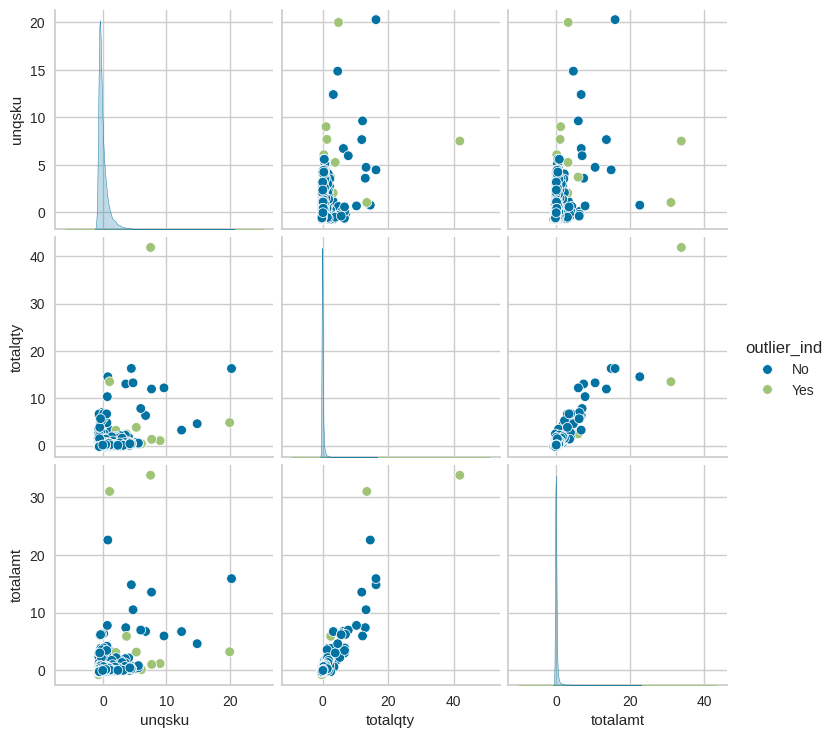

In [177]:
# Drawing the pair plot
cust_norm['outlier_ind'] = "No"
cust_norm.loc[cust_norm['lof_scores']>2, 'outlier_ind'] = "Yes"
cust_pair = cust_norm.drop(['lof_scores'], axis = 1)
sns.pairplot(cust_pair, hue = 'outlier_ind', diag_kind= "kde")

##### Outlier Detection Visualization with PCA

In [178]:
from sklearn.decomposition import PCA

cust_pca = cust_norm.drop(["lof_scores", "outlier_ind"], axis=1)
cust_pca.head()

,unqsku,totalqty,totalamt
0,-0.704922,-0.239517,-0.230420
1,0.489243,0.286544,0.294055
2,-0.459064,0.261504,-0.011717
3,0.138018,-0.104470,-0.016547
4,-0.517602,-0.197355,-0.189727


In [179]:
pca = PCA(n_components=2)
prComponents = pca.fit_transform(cust_pca)
pca_df = pd.DataFrame(prComponents, columns = ['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-0.609941,-0.485017
1,0.584626,0.256735
2,-0.043927,-0.483970
3,-0.015928,0.159752
4,-0.474510,-0.343006


Text(0, 0.5, 'PC2')

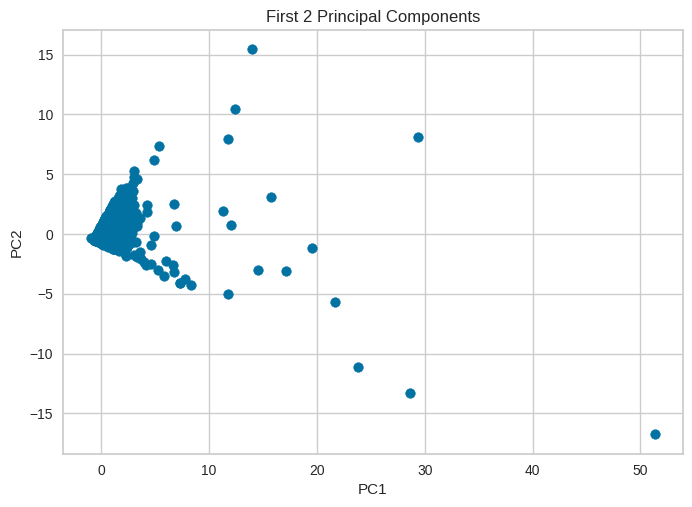

In [180]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title("First 2 Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")

##### Visualzing the PCA where LOF SCore > 2

Text(55.78133333333332, 0.5, 'PC2')

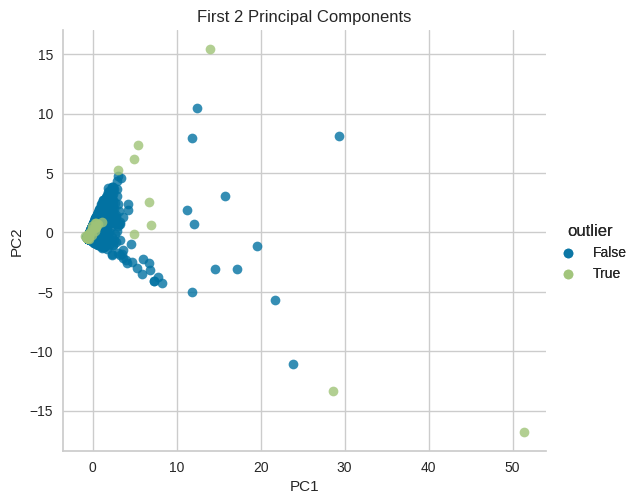

In [181]:
pca_df['outlier'] = cust_norm['lof_scores']>2
pca_df.head()
sns.lmplot(x="PC1", y="PC2", data=pca_df, fit_reg=False, hue='outlier')\
    .add_legend()
plt.title("First 2 Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")

#### **Temporal Anomaly Detection**

In [182]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S').dt.date
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month,Week,YearWeek,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,12,48,2010-11-29/2010-12-05,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,48,2010-11-29/2010-12-05,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,12,48,2010-11-29/2010-12-05,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,48,2010-11-29/2010-12-05,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,48,2010-11-29/2010-12-05,Wednesday


In [183]:
#Keeping Date and Amount column
df_dttm = retail_df[['InvoiceDate','Total']]
df_dttm.head()

,InvoiceDate,Total
0,2010-12-01,15.30
1,2010-12-01,20.34
2,2010-12-01,22.00
3,2010-12-01,20.34
4,2010-12-01,20.34


Text(0.5, 0, 'Day of the Year')

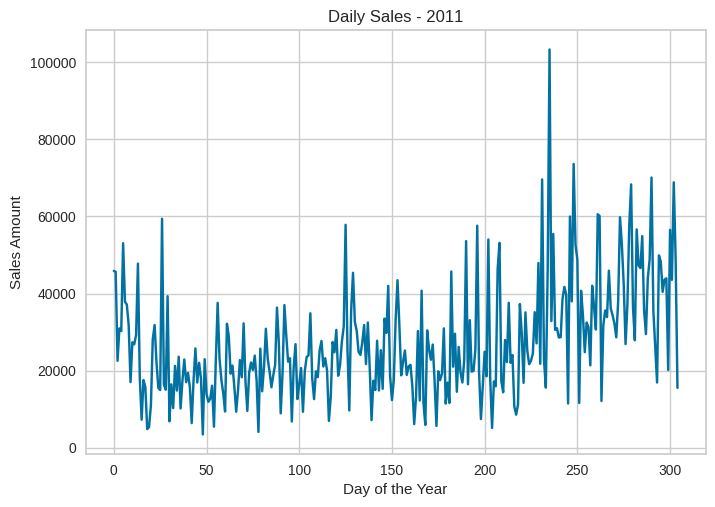

In [184]:
# Calculating Total Amount per day
df_dtgrp = df_dttm.groupby('InvoiceDate').sum('Total').reset_index()
df_dtgrp.head()

# Visualizing the Data
df_dtgrp['Total'].plot()
plt.title("Daily Sales - 2011")
plt.ylabel("Sales Amount")
plt.xlabel("Day of the Year")

##### Using STL  (Seasonal-Trend decomposition using LOESS) method from the statsmodels library to decompose a time series into its seasonal, trend, and residual components

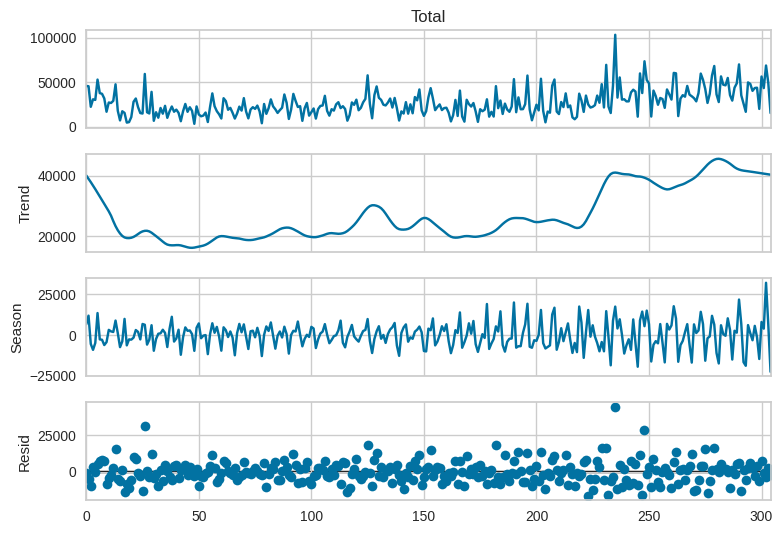

In [185]:
from statsmodels.tsa.seasonal import STL

# Using Total as column to decompose over 12 period
stl = STL(df_dtgrp['Total'],  period = 12)
res = stl.fit()
fig = res.plot()

##### Printing trend from STL

Text(0.5, 0, 'Day of the Year')

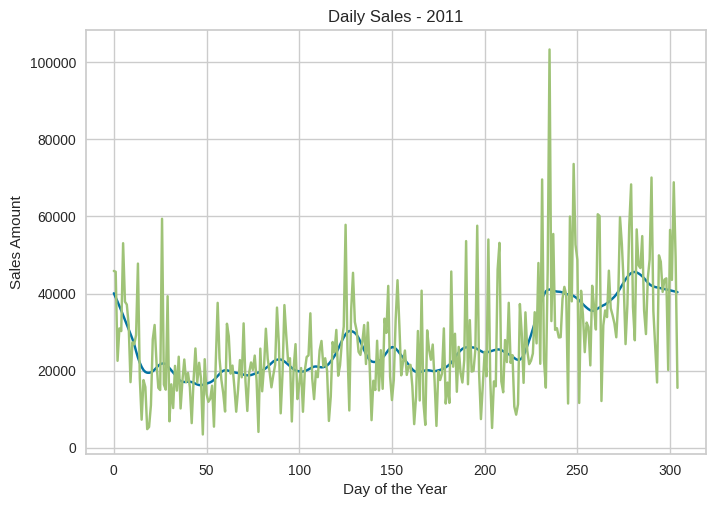

In [186]:
figure, ax = plt.subplots()
res.trend.plot(ax=ax)
df_dtgrp['Total'].plot(ax=ax)
plt.title("Daily Sales - 2011")
plt.ylabel("Sales Amount")
plt.xlabel("Day of the Year")

##### Printing residual from STL

Text(0.5, 1.0, 'Density of the Noice')

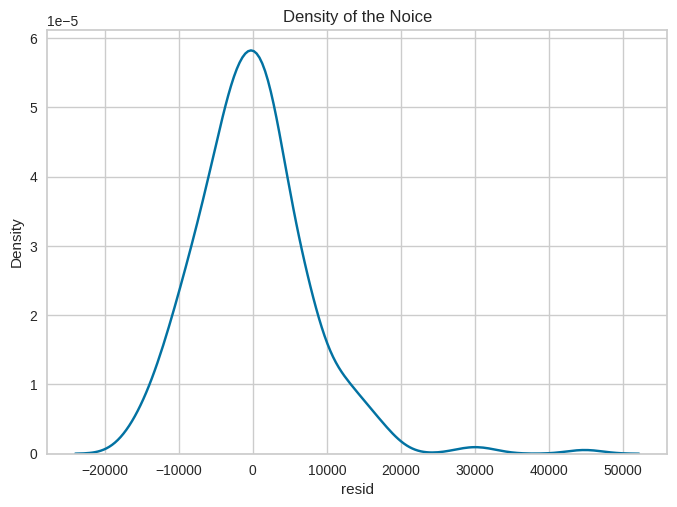

In [187]:
noise = res.resid
sns.kdeplot(noise)
plt.title("Density of the Noice")

##### Visualizing the Outliers

The gesd (General Extreme Studentized Deviate) function iteratively identifies and removes outliers from a dataset based on their z-scores and critical values derived from the Student's t-distribution. The results provide information about the number of outliers found and their rankings. Function has following parameters

 obs: The input data (observations) as a NumPy array or pandas Series.

 alpha: The significance level for the test (e.g., 0.05 for a 5% significance level).

 value_zscore: A flag indicating whether the input values are already z-scores ('yes' or 'no'). Defaults to 'no'.

 r: The maximum number of outliers to look for. If not provided, it defaults to half the sample size.

In [188]:
import math
import scipy.stats as stats
def gesd(obs, alpha, value_zscore = np.nan, r = np.nan):
    n = len(obs)
    if (pd.isna(r)): # by default, set upper bound on number of outliers 'r' to 1/2 sample size
        r = math.floor(n/2)
    R = np.zeros(shape = r) # test statistics for 'r' outliers
    lamb = np.zeros(shape = r) # critical values for 'r' outliers
    outlier_ind = np.zeros(shape = r) # removed outlier observation values
    outlier_val = np.zeros(shape = r) # removed outlier observation values

    m = 0   # number of outliers
    obs_new = np.array(obs) # temporary observation values

    ### Find outliers ####
    for i in range(r):

        #### Compute test statistic ####
        if (str.lower(value_zscore) == "yes"):
            z = abs(obs_new) # If Z-score is alrealy computed
        elif (str.lower(value_zscore) == "no"):
            z = abs(obs_new - np.mean(obs_new))/np.std(obs_new) # Z-scores
        else:
            print("ERROR! Inappropriate value for value.score=[YES|NO]")

        max_ind = np.argmax(z) # in case of ties, return first one
        R[i] = z[max_ind] # max Z-score

        outlier_val[i] = obs_new[max_ind] # removed outlier observation values
        outlier_ind[i] = max_ind # index of removed outlier observation values

        obs_new = np.delete(obs_new, max_ind) # remove observation that maximizes |x_i - x_mean|

        #### Compute critical values ####
        p = 1 - alpha/(2*(n-i+1)) # probability
        t_pv = stats.t.ppf(p, (n-i-1)) # Critical value from Student's t distribution
        lamb[i] = ((n-i)*t_pv) / (math.sqrt((n-i-1+t_pv**2)*(n-i+1)))

        #### Find the exact number of outliers: largest 'i' such that R_i > lambda_i ####
        #print(i, R[i], lamb[i])
        if ( (not pd.isna(R[i])) & (not pd.isna(lamb[i])) ): # stats.t.ppf can produces nans
            if (R[i] > lamb[i]):
                m = i + 1
    vals = pd.DataFrame.from_dict(dict(zip(['NumOutliers','TestStatistic','CriticalValue'],
                                           [range(r),R,lamb])))

    #print (m)
    outlier_rank = np.zeros(shape = n) - 1
    if ( m> -1):
        for i in range(m):
            outlier_rank[np.where(obs==outlier_val[i])] = i
            #print(outlier_rank[np.where(obs==outlier_val[i])])

    res = dict()
    res['table'] = vals
    res['num_outliers'] = sum(outlier_rank!= -1)
    res['outlier_rank'] = outlier_rank
    return res

In [189]:
#assuming no more than 5% of my data will be an outliers
r = round(len(noise) * 0.05)

#the critical value of my test
alpha = 0.1
gesd_result = gesd(noise, alpha,"No", r)

##### The object returned by `gesd` will tell you how many outliers it detected in its `num_outliers` property

In [190]:
gesd_result['num_outliers']

3

##### Additionally, in its `table` property, the `gesd` object will produce a table for each row $i$, which compares $R_i$ (the test statistics) to $\lambda_i$ (the critical value)

In [191]:
gesd_result['table']

,NumOutliers,TestStatistic,CriticalValue
0,0,5.853889,3.558136
1,1,4.347312,3.557195
2,2,4.151640,3.556251
3,3,2.777671,3.555303
4,4,2.778774,3.554351
5,5,2.568579,3.553396
6,6,2.585010,3.552437
7,7,2.584480,3.551475
8,8,2.493284,3.550509
9,9,2.506373,3.549540


##### Finally, in its `outlier_rank` property, the `gesd` object will produce a vector (in order of the original data points) which contains the rank of the outlier (or -1 if the point is not an outlier).

In [192]:
gesd_result['outlier_rank']

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [193]:
detected = gesd_result['outlier_rank']>-1

##### After applying the filter on outlier Rank following is the Outlier detected

In [194]:
detected

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

#### Plotting the detected object

The primary purpose of the plot_detected function is to visualize a time series represented by the input DataFrame (df) and highlight the points that have been identified as outliers (using the detected array). The function has following arguments

**df**: A pandas DataFrame containing the time series data. It is assumed to have a column named 'InvoiceDate' representing the dates and another

 **column** (specified by column_name) containing the values to be plotted.

**detected**: A boolean array (or array of indices) indicating the locations of the detected outliers in the time series.

**column_name**: A string specifying the name of the column in the DataFrame (df) that contains the values to be plotted.

In [195]:
import datetime as dt
import matplotlib.dates as mdates

def plot_detected(df, detected, column_name):
    x = df.index  # Use df.index for dates
    y = df[column_name].values
    fig, ax = plt.subplots(figsize=(18, 6))

    # Convert dates to matplotlib dates
    # Assuming 'InvoiceDate' is a column in your DataFrame
    x_dates = [dt.datetime.strptime(str(d), '%Y-%m-%d').date() for d in df['InvoiceDate']]
    x_num = mdates.date2num(x_dates)

    ax.plot_date(x_num, y, linestyle='solid')

    detected_ind = np.where(detected)[0]

    for i in range(len(detected_ind)):
        ax.annotate('Outlier', (x_num[detected_ind[i]], y[detected_ind[i]]), xytext=(60, 60),
                    textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

    # Format x-axis to display years correctly
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()  # Auto-format dates for better readability

    plt.show()

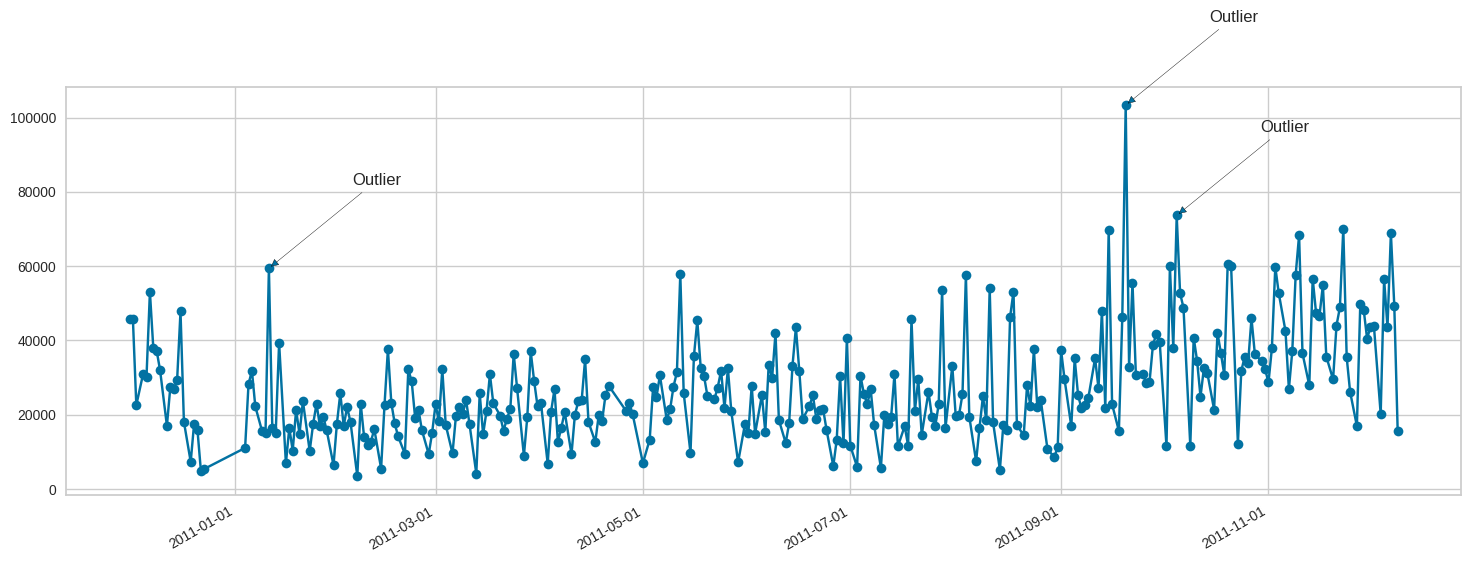

In [196]:
plot_detected(df_dtgrp, detected, column_name = 'Total')

In [197]:
cst_df

,CustomerID,unqsku,totalqty,totalamt
0,12346.0,1,0,0.00
1,12347.0,103,2458,4310.00
2,12348.0,22,2341,1797.24
3,12349.0,73,631,1757.55
4,12350.0,17,197,334.40
...,...,...,...,...
4367,18280.0,10,45,180.60
4368,18281.0,7,54,80.82
4369,18282.0,12,98,176.60
4370,18283.0,263,1357,2045.53


#### Association Rule Discovery

In [198]:
from mlxtend.frequent_patterns import apriori, association_rules

In [199]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month,Week,YearWeek,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,12,48,2010-11-29/2010-12-05,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,48,2010-11-29/2010-12-05,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,12,48,2010-11-29/2010-12-05,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,48,2010-11-29/2010-12-05,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,48,2010-11-29/2010-12-05,Wednesday


In [200]:
# Preprocess the data using one-hot encoding
# where dataframe where each column represents an item and each row represents a transaction.
basket = retail_df.groupby(['InvoiceNo', 'StockCode'])['StockCode'].count().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

In [201]:
print(basket.head())

StockCode  10002  10080  10120  10123C  10124A  10124G  10125  10133  10135  \
InvoiceNo                                                                     
536365         0      0      0       0       0       0      0      0      0   
536366         0      0      0       0       0       0      0      0      0   
536367         0      0      0       0       0       0      0      0      0   
536368         0      0      0       0       0       0      0      0      0   
536369         0      0      0       0       0       0      0      0      0   

StockCode  11001  ...  90214Y  90214Z  BANK CHARGES  C2  CRUK  D  DOT  M  \
InvoiceNo         ...                                                      
536365         0  ...       0       0             0   0     0  0    0  0   
536366         0  ...       0       0             0   0     0  0    0  0   
536367         0  ...       0       0             0   0     0  0    0  0   
536368         0  ...       0       0             0   0     0  0  

In [202]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.025, use_colnames=True)

print("Frequent Itemsets:\n", frequent_itemsets.head())

Frequent Itemsets:
     support itemsets
0  0.026273  (20685)
1  0.034024  (20724)
2  0.059937  (20725)
3  0.037810  (20726)
4  0.048355  (20727)


In [203]:
frequent_itemsets.sort_values(['support'], ascending=False)

,support,itemsets
94,0.091032,(85123A)
38,0.084903,(22423)
91,0.074042,(85099B)
82,0.063046,(47566)
87,0.062416,(84879)
...,...,...
24,0.025913,(22090)
18,0.025642,(21915)
16,0.025101,(21755)
97,0.025101,"(22697, 22699)"


In [204]:
frequent_items_indexed = frequent_itemsets.set_index('itemsets')
frequent_items_indexed.head()

,support
itemsets,
(20685),0.026273
(20724),0.034024
(20725),0.059937
(20726),0.037810
(20727),0.048355


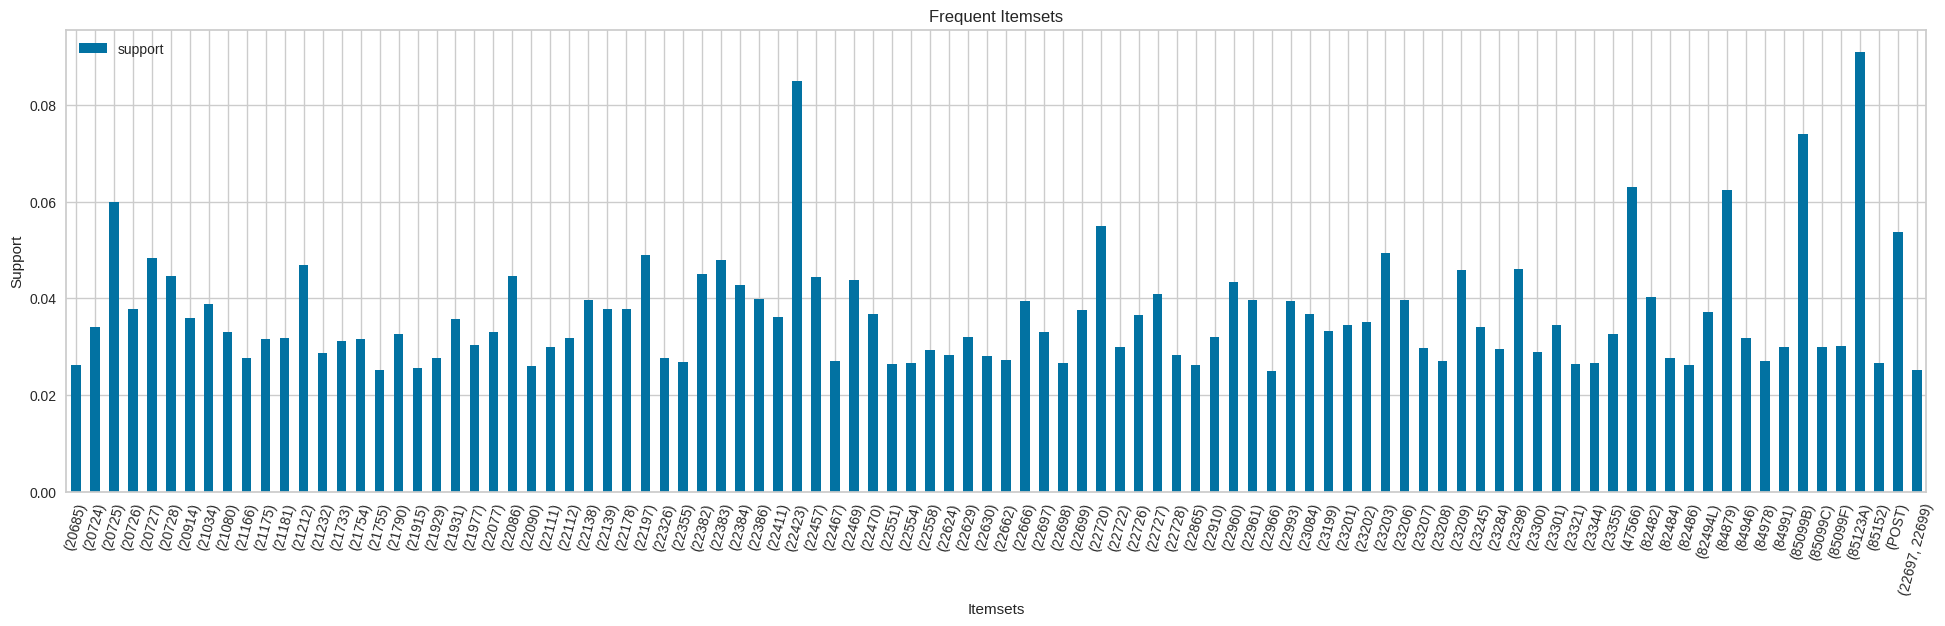

In [205]:
frequent_items_indexed.plot(kind='bar', figsize=(24, 6))
plt.title("Frequent Itemsets")
plt.ylabel("Support")
plt.xlabel("Itemsets")
plt.xticks(rotation=75)
plt.show()

In [206]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, num_itemsets=frequent_itemsets['itemsets'].apply(len))

# Display the results

print("\nAssociation Rules (lift):\n", rules.head())

# 1. Using 'confidence' metric
rules_confidence = association_rules(frequent_itemsets, metric="confidence",min_threshold=0.7, num_itemsets=frequent_itemsets['itemsets'].apply(len))
print("\nAssociation Rules (Confidence):\n", rules_confidence.head())

# 2. Using 'support' metric
rules_support = association_rules(frequent_itemsets, metric="support", min_threshold=0.05,  num_itemsets=frequent_itemsets['itemsets'].apply(len))
print("\nAssociation Rules (Support):\n", rules_support.head())

# 3. Using 'leverage' metric
rules_leverage = association_rules(frequent_itemsets, metric="leverage", min_threshold=0.01, num_itemsets=frequent_itemsets['itemsets'].apply(len))
print("\nAssociation Rules (Leverage):\n", rules_leverage.head())

# 4. Using 'conviction' metric
rules_conviction = association_rules(frequent_itemsets, metric="conviction", min_threshold=1.5, num_itemsets=frequent_itemsets['itemsets'].apply(len))
print("\nAssociation Rules (Conviction):\n", rules_conviction.head())



Association Rules (lift):
   antecedents consequents  antecedent support  consequent support   support  \
0     (22697)     (22699)            0.033033            0.037675  0.025101   
1     (22699)     (22697)            0.037675            0.033033  0.025101   

   confidence      lift  representativity  leverage  conviction  \
0    0.759891  20.16983               1.0  0.023857    4.007866   
1    0.666268  20.16983               1.0  0.023857    2.897435   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.982889  0.550395   0.750491    0.713079  
1       0.987630  0.550395   0.654867    0.713079  

Association Rules (Confidence):
   antecedents consequents  antecedent support  consequent support   support  \
0     (22697)     (22699)            0.033033            0.037675  0.025101   

   confidence      lift  representativity  leverage  conviction  \
0    0.759891  20.16983               1.0  0.023857    4.007866   

   zhangs_metric   jaccard  certainty  kulczynsk

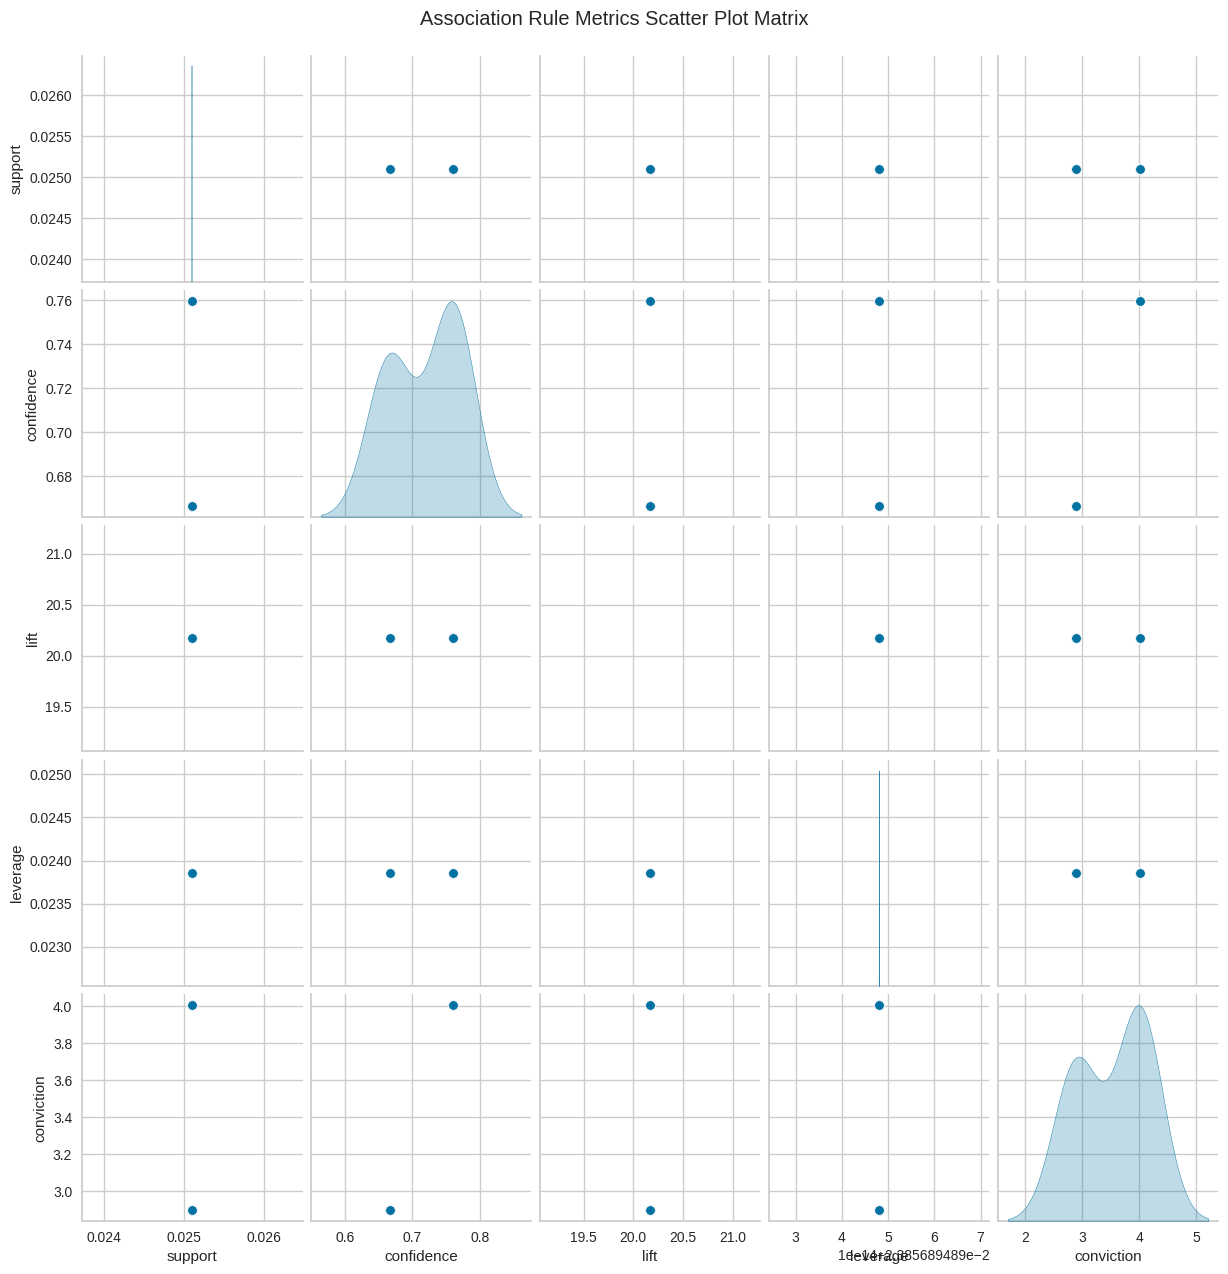

In [207]:
# Concatenate all rules DataFrames into a single DataFrame
all_rules = pd.concat([rules, rules_confidence, rules_support, rules_leverage, rules_conviction])

# Create a scatter plot matrix
sns.pairplot(all_rules[['support', 'confidence', 'lift', 'leverage', 'conviction']], diag_kind='kde')
plt.suptitle('Association Rule Metrics Scatter Plot Matrix', y=1.02)  # Add a title
plt.show()

#### Recommendation engine
##### We are using Cosine similarity to build the recommendation for the customer

In [208]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month,Week,YearWeek,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,12,48,2010-11-29/2010-12-05,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,48,2010-11-29/2010-12-05,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,12,48,2010-11-29/2010-12-05,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,48,2010-11-29/2010-12-05,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,48,2010-11-29/2010-12-05,Wednesday


In [209]:
# This recommendation engine will use only Customer ID and Products so keeping only those columns
prd_df = retail_df[['CustomerID', 'StockCode', 'Description']]
prd_df = prd_df.dropna()
prd_df['CustomerID'] = prd_df['CustomerID'].astype(int)
prd_df['StockCode'] = prd_df['StockCode'].astype(str)

#Creating Customer and Product pivot table
matrix = prd_df.pivot_table(index='CustomerID', columns='Description',
aggfunc=len, fill_value=0)
cosine_sim = cosine_similarity(matrix)

In [210]:
def get_prod_recommend(customer_id, cosine_sim=cosine_sim,
    matrix=matrix, df=prd_df):
    idx = matrix.index.get_loc(customer_id)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    customer_indices = [i[0] for i in sim_scores]
    recommendations = matrix.iloc[customer_indices,:].sum().sort_values(ascending=False).head(10)
    return recommendations

#### Generating product recommendation for customer

In [211]:
#We need to pass any valid customer ID, to generate recommendations
customer_id = 12347

In [212]:
recommended_products = get_prod_recommend(customer_id)
print("Top-10 Recommendations for Customer - ", customer_id)
# print(recommended_products)
recommended_products_df = pd.DataFrame(recommended_products)

recommended_products_df.index.name = 'Description'  # Rename the index to Description
recommended_products_df = recommended_products_df.reset_index() #Reset the index
# Rename Description to Products
recommended_products_df = recommended_products_df.rename(columns={'Description': 'Products'})
# Display without index
print(recommended_products_df[['Products']].to_string(index=False))

Top-10 Recommendations for Customer -  12347
                        Products
       ALARM CLOCK BAKELIKE RED 
      ALARM CLOCK BAKELIKE GREEN
     ALARM CLOCK BAKELIKE ORANGE
      ALARM CLOCK BAKELIKE IVORY
       ALARM CLOCK BAKELIKE PINK
        REGENCY CAKESTAND 3 TIER
   SMALL GLASS HEART TRINKET POT
ROSES REGENCY TEACUP AND SAUCER 
   ASSORTED COLOUR BIRD ORNAMENT
  PINK REGENCY TEACUP AND SAUCER


#### ARIMA Forecasting

In [213]:
def forecast_revenue(weekly_revenue, type):
  warnings.filterwarnings("ignore")

  # Convert the Period index to DateTime index for weekly revenue
  weekly_revenue.index = weekly_revenue.index.to_timestamp()

  # Ensure the weekly_revenue is numeric (float type)
  weekly_revenue = weekly_revenue.astype(float)

  # Perform ADF Test on the original data
  result = adfuller(weekly_revenue)

  print("p-value:", result[1])

  if result[1] > 0.05:
      print("Data is non-stationary. Differencing is required.")
      # First differencing
      diff_revenue = weekly_revenue.diff().dropna()

      # Perform ADF test on differenced data
      result_diff = adfuller(diff_revenue)
      print("\nAfter Differencing:")
      print("p-value:", result_diff[1])

      if result_diff[1] > 0.05:
          print("Data is still non-stationary. Higher differencing may be required.")
      else:
          print("Data is stationary after first differencing (d=1).")
          D = 1
  else:
      print("Data is stationary. No differencing required (d=0).")
      D = 0

  #Split the data into train and test
  train_size = int(len(weekly_revenue) * 0.7)  # Use 70% of data for training
  train, test = weekly_revenue[:train_size], weekly_revenue[train_size:]

  # Perform grid search for best p and q values
  def grid_search_arima(train, test, p_range, q_range, d):
      best_rmse = float('inf')
      best_order = None
      results = []

      for p, q in product(p_range, q_range):
          try:
              model = ARIMA(train, order=(p, d, q))
              model_fit = model.fit()
              forecast = model_fit.forecast(steps=len(test))
              rmse = np.sqrt(mean_squared_error(test, forecast))
              results.append((p, q, rmse))

              if rmse < best_rmse:
                  best_rmse = rmse
                  best_order = (p, d, q)
          except Exception as e:
              continue

      return best_order, best_rmse, results

  #Perform grid search over p and q values
  p_range = range(0,10)  # Adjust range as needed
  q_range = range(0,10)
  best_order, best_rmse, results = grid_search_arima(train, test, p_range, q_range, D)

  # Print the best parameters and RMSE
  print(f'Best ARIMA Order: {best_order}')
  print(f'Best RMSE: {best_rmse:.2f}')

  # Train the model with the best order and forecast
  best_model = ARIMA(train, order=best_order)
  best_model_fit = best_model.fit()
  forecast = best_model_fit.forecast(steps=len(test))

  # Plot the results
  plt.figure(figsize=(10, 6))
  plt.plot(train.index, train, label='Train')
  plt.plot(test.index, test, label='Test', color='blue')
  plt.plot(test.index, forecast, label='Forecast', color='red')
  plt.title('Test vs Forecast of Weekly Revenue')
  plt.xlabel('Week')
  plt.ylabel('Revenue')
  plt.legend()
  plt.grid(True)
  plt.show()

  # Display grid search results
  results_df = pd.DataFrame(results, columns=['p', 'q', 'RMSE']).sort_values(by='RMSE')

  # Train ARIMA model with best p, d, q values
  model = ARIMA(weekly_revenue, order=(best_order))
  model_fit = model.fit()

  # Forecast future values (next 12 weeks)
  forecast = model_fit.forecast(steps=12)

  forecast_dates = pd.date_range(weekly_revenue.index[-1], periods=13, freq='W')[1:]

  # Create a DataFrame with the forecasted values and corresponding dates
  forecast_df = pd.DataFrame({
      'Date': forecast_dates,
      'Forecast': forecast
  })

  # Display the forecast DataFrame
  print(forecast_df)

  # Plot the forecasted values
  plt.figure(figsize=(10, 6))
  plt.plot(weekly_revenue.index, weekly_revenue, label='Revenue from Orders')
  plt.plot(forecast_dates, forecast, label='Forecast', color='red')
  plt.title(f'Forecast of Weekly Revenue From {type} Orders')
  plt.xlabel('Week')
  plt.ylabel('Revenue')
  plt.legend()
  plt.grid(True)
  plt.show()

##### Forecasting Local Orders

p-value: 0.35347759471430723
Data is non-stationary. Differencing is required.

After Differencing:
p-value: 2.4295836915956615e-09
Data is stationary after first differencing (d=1).
Best ARIMA Order: (9, 1, 8)
Best RMSE: 41136.21


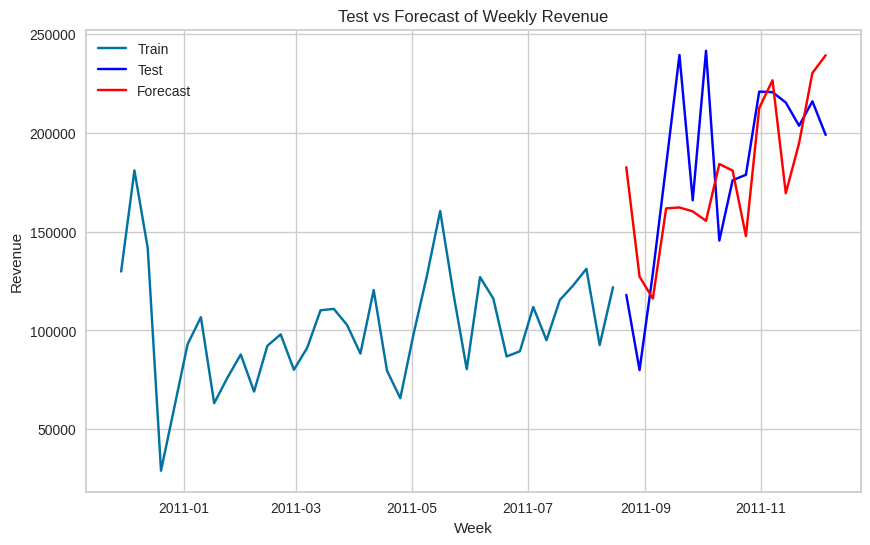

         Date       Forecast
53 2011-12-18  209869.563149
54 2011-12-25  208819.962678
55 2012-01-01  190706.405529
56 2012-01-08  204013.149757
57 2012-01-15  193748.363234
58 2012-01-22  189810.771074
59 2012-01-29  199704.757604
60 2012-02-05  193394.806616
61 2012-02-12  194734.127268
62 2012-02-19  189343.383568
63 2012-02-26  198796.474435
64 2012-03-04  190685.147593


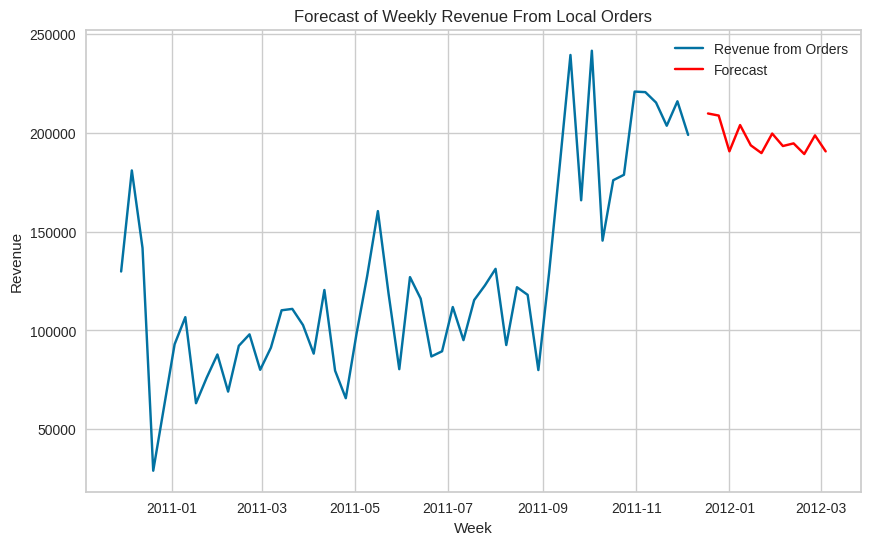

In [214]:
weekly_revenue = local_orders.groupby('YearWeek')['Total'].sum().abs()
forecast_revenue(weekly_revenue, "Local")

##### Forecasting International Orders



p-value: 0.21373476791741863
Data is non-stationary. Differencing is required.

After Differencing:
p-value: 3.3529305236180716e-09
Data is stationary after first differencing (d=1).
Best ARIMA Order: (3, 1, 0)
Best RMSE: 12150.02


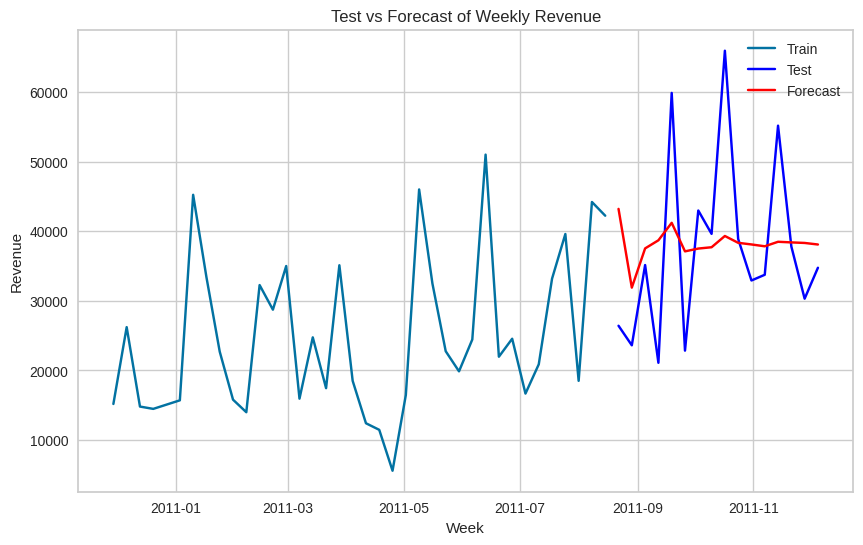

         Date      Forecast
53 2011-12-18  44081.666524
54 2011-12-25  39981.140658
55 2012-01-01  36029.629227
56 2012-01-08  35753.513175
57 2012-01-15  39777.435863
58 2012-01-22  39368.032789
59 2012-01-29  37905.386103
60 2012-02-05  37006.315377
61 2012-02-12  38440.488417
62 2012-02-19  38690.260604
63 2012-02-26  38320.467561
64 2012-03-04  37723.819062


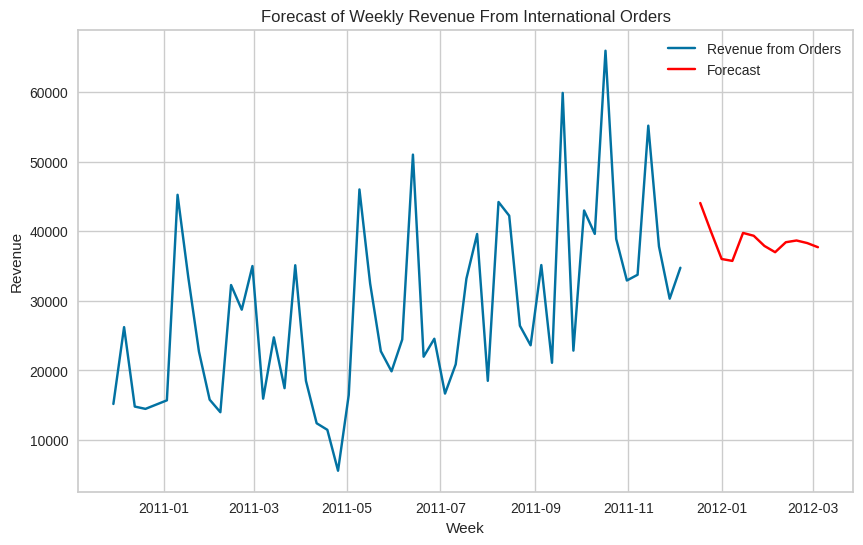

In [215]:
weekly_revenue = international_orders.groupby('YearWeek')['Total'].sum().abs()
forecast_revenue(weekly_revenue, "International")